# Basic Ideas
Tree-based methods partition the feature space into a set of rectangles, and
then fit a simple model (like a constant) in each one.

Decision tree builds regression or classification models in the form of a tree structure. 

- It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. 
- The final result is a tree with decision nodes and leaf nodes. 
 - A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. 
 - Leaf node (e.g., Hours Played) represents a decision on the numerical target. 
 - The topmost decision node in a tree which corresponds to the best predictor called root node. 
- Decision trees can handle both categorical and numerical data. 

<img src="./images/dt1.png" width=350>
<img src="./images/dt2.png" width=350>

# CART
## Concept
Our data: 
- $(x_i,y_i)$ for i=1,2,....,N, with $x_i=(x_{i1},x_{i2},...,x_{ip})$

The algo needs to automatically decide on the splitting variables and split points,and also what topology (shape) the tree should have. Suppose first that we have a partition into M regions $R_1,R_2,...R_M$, and we model the response as a constant $c_m$ in each region:

\begin{align}
f(x)=\sum_{i=1}^M c_m I(x \in R_m)
\end{align}

If we adopt as our criterion minimization of the sum of squares $\sum(y_i-f(x_i))^2$,it is easy to see that the best $\hat{c_m}$ is just the average of $y_i$ in region $R_m$

\begin{align}
\hat{c_m}=ave(y_i|x_i \in R_m)
\end{align}

## Greedy Algorithm
Now finding the best binary partition in terms of minimum sum of squares is generally computationally infeasible. 

Hence we proceed with a *greedy algorithm*. 

1. Starting with all of the data, consider a splitting variable j and split point s
2. Define the pair of half-planes
\begin{align}
R_1(j,s)=\{X|X_j\leq s \},  R_2(j,s)=\{X|X_j > s \}
\end{align}

3. Seek the splitting variable j and split point s that solve:
\begin{align}
min_{j,s} \left[ min_{c_1}\sum_{x_i \in R_1(j,s)}(y_i-c_1)^2+min_{c_2}\sum_{x_i \in R_2(j,s)}(y_i-c_2)^2 \right]
\end{align}

4. For any choice j and s, the inner minimization is solved by:
\begin{align}
\hat{c_1}=ave(y_i|x_i \in R_1(j,s)) \\
\hat{c_2}=ave(y_i|x_i \in R_2(j,s))
\end{align}
> For each splitting variable, the determination of the split point s can be done very quickly and hence by scanning through all of the inputs,determination of the best pair (j; s) is feasible.

5. Having found the best split, we partition the data into the two resulting
regions and repeat the splitting process on each of the two regions.

## Pruning
**How large should we grow the tree?**

The preferred strategy is to grow a large tree $T_0$, stopping the splitting process only when some minimum node size (say 5) is reached. Then this large tree is pruned using **cost-complexity pruning**

1. Define a subtree $T \in T_0$ to be any tree that can be obtained by pruning $T_0$, that is, collapsing any number of its internal (non-terminal) nodes. 
 - Index terminal nodes by $m$, with node m representing region $R_m$. 
 - $|T|$: the number of terminal nodes in T. 
 - $N_m=\#\{x_i \in R_m\}$
 - $\hat{c}_m=\frac{1}{N_m}\sum_{x_i \in R_m}y_i$
 - $Q_m(T)=\frac{1}{N_m}\sum_{x_i \in R_m}(y_i-\hat{c}_m)^2$
 
2. Define cost complexity criterion:
\begin{align}
C_\alpha(T)=\sum_{m=1}^{|T|}N_mQ_m(T)+\alpha|T|
\end{align}

### Intuition
The idea is to find, for each $\alpha$, the subtree $T_\alpha \in T_0$ to minimize $C_\alpha(T)$.

The tuning parameter $\alpha \geq0$ governs the tradeoff between tree size and its
goodness of fit to the data. Large values of $\alpha$ result in smaller trees $T_\alpha$. As the notation suggests, with $\alpha$ = 0 the solution is the full tree $T_0$.

### Adaptively choose $\alpha$

> For each $\alpha$ one can show that there is a unique smallest subtree $T_\alpha$ that
minimizes $C_\alpha(T)$.

- To find $T_\alpha$ we use **weakest link pruning**: we successively collapse the internal node that produces the smallest per-node increase in $\sum_{m}N_mQ_m(T)$, and continue until we produce the single-node (root) tree.
- This gives a (finite) sequence of subtrees, and one can show this sequence must contain $T_\alpha$.

# Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df=pd.read_csv('./data/Position_Salaries.csv')
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1:].values

# Feature scaling
from sklearn.preprocessing import StandardScaler
stan_x=StandardScaler()
stan_y=StandardScaler()
X=stan_x.fit_transform(X)
y=stan_y.fit_transform(y)

/home/nancy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nancy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nancy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nancy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

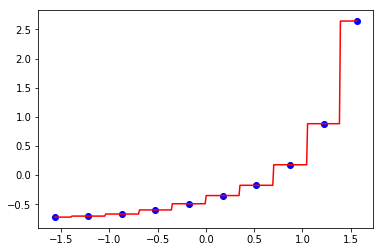

In [4]:
#Plot decision tree regression for higher resolution and smoother curve
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((X_grid.shape[0],1))
plt.scatter(X,y,color='blue')
plt.plot(X_grid,regressor.predict(X_grid),color='red')

Decision  Tree Regression is nonlinear nor non-continuous regression model.The best way to visualize and non-continuous regression model si to visualize the regression model results in higher resolution.

# Questions

## How does the algorithm split the data points?
It uses reduction of standard deviation of the predictions. In other words, the standard deviation is decreased
right after a split. Hence, building a decision tree is all about ﬁnding the attribute that returns the highest
standard deviation reduction (i.e., the most homogeneous branches).  

## What is the Information Gain and how does it work in Decision Trees?
The Information Gain in Decision Tree Regression is exactly the Standard Deviation Reduction we are
looking to reach. 

We calculate by how much the Standard Deviation decreases after each split. Because the
more the Standard Deviation is decreased after a split, the more homogeneous the child nodes will be.

## What is the Entropy and how does it work in Decision Trees?
The Entropy measures the **disorder in a set**, here in a part resulting from a split. So the more homogeneous
is your data in a part, the lower will be the entropy. The more you have splits, the more you have chance
to ﬁnd parts in which your data is homogeneous, and therefore the lower will be the entropy (close to 0) in
these parts. However you might still ﬁnd some nodes where the data is not homogeneous, and therefore the
entropy would not be that small.

## Does a Decision Tree make much sense in 1D?
Not really, as we saw in the practical part of this section. In 1D (meaning one independent variable), the
Decision Tree clearly tends to overﬁt the data. The Decision Tree would be much more relevant in higher
dimension, but keep in mind that the implementation we made here in 1D would be exactly the same in
higher dimension. Therefore you might want to keep that model in your toolkit in case you are dealing
with a higher dimensional space. This will actually be the case in Part 3 - Classiﬁcation, where we will use
Decision Tree for Classiﬁcation in 2D, which you will see turns out to be more relevant.